In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns

In [18]:

df = pd.read_csv(r'C:/Users/HP/Desktop/MY PROJECTS/MINI PROJECT/Pizza_Sale - pizza_sales.csv')
df.head(10)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6,2,thai_ckn_l,1,1/1/2015,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,7,3,ital_supr_m,1,1/1/2015,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8,3,prsc_argla_l,1,1/1/2015,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9,4,ital_supr_m,1,1/1/2015,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10,5,ital_supr_m,1,1/1/2015,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [21]:
df.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [156]:
df_cleaned = df.dropna(subset=['pizza_name_id', 'pizza_category', 'pizza_ingredients', 'pizza_name','total_price'], axis=0)

In [157]:
df_cleaned=df_cleaned.drop(columns=['order_id','pizza_id'])

In [158]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48554 entries, 0 to 48619
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_name_id      48554 non-null  object 
 1   quantity           48554 non-null  int64  
 2   order_date         48554 non-null  object 
 3   order_time         48554 non-null  object 
 4   unit_price         48554 non-null  float64
 5   total_price        48554 non-null  float64
 6   pizza_size         48554 non-null  object 
 7   pizza_category     48554 non-null  object 
 8   pizza_ingredients  48554 non-null  object 
 9   pizza_name         48554 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.1+ MB


In [159]:
df_cleaned['order_date'].unique()

array(['1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015',
       '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015',
       '11/1/2015', '12/1/2015', '13-01-2015', '14-01-2015', '15-01-2015',
       '16-01-2015', '17-01-2015', '18-01-2015', '19-01-2015',
       '20-01-2015', '21-01-2015', '22-01-2015', '23-01-2015',
       '24-01-2015', '25-01-2015', '26-01-2015', '27-01-2015',
       '28-01-2015', '29-01-2015', '30-01-2015', '31-01-2015', '1/2/2015',
       '2/2/2015', '3/2/2015', '4/2/2015', '5/2/2015', '6/2/2015',
       '7/2/2015', '8/2/2015', '9/2/2015', '10/2/2015', '11/2/2015',
       '12/2/2015', '13-02-2015', '14-02-2015', '15-02-2015',
       '16-02-2015', '17-02-2015', '18-02-2015', '19-02-2015',
       '20-02-2015', '21-02-2015', '22-02-2015', '23-02-2015',
       '24-02-2015', '25-02-2015', '26-02-2015', '27-02-2015',
       '28-02-2015', '1/3/2015', '2/3/2015', '3/3/2015', '4/3/2015',
       '5/3/2015', '6/3/2015', '7/3/2015', '8/3/2015', '9/3/2015',
   

In [160]:
df_cleaned['order_date'] = pd.to_datetime(df_cleaned['order_date'], format='%d-%m-%Y', errors='coerce').fillna(
    pd.to_datetime(df_cleaned['order_date'], format='%m/%d/%Y', errors='coerce')
)
df_cleaned['order_time'] = pd.to_datetime(df_cleaned['order_time'], format='%H:%M:%S')

In [161]:
df_cleaned['year'] = df_cleaned['order_date'].dt.year
df_cleaned['month'] = df_cleaned['order_date'].dt.month
df_cleaned['date'] = df_cleaned['order_date'].dt.day

In [162]:
df_cleaned['order_time'] = df_cleaned['order_time'].dt.time

In [155]:
df_cleaned.head(10)

,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year,month,date
0,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,1,1
1,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,1,1
2,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,1,1
3,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,1,1
4,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,1,1
5,1,2015-01-01,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza,2015,1,1
6,1,2015-01-01,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,1,1
7,1,2015-01-01,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza,2015,1,1
8,1,2015-01-01,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,1,1
9,1,2015-01-01,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,1,1


In [163]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48554 entries, 0 to 48619
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_name_id      48554 non-null  object        
 1   quantity           48554 non-null  int64         
 2   order_date         48554 non-null  datetime64[ns]
 3   order_time         48554 non-null  object        
 4   unit_price         48554 non-null  float64       
 5   total_price        48554 non-null  float64       
 6   pizza_size         48554 non-null  object        
 7   pizza_category     48554 non-null  object        
 8   pizza_ingredients  48554 non-null  object        
 9   pizza_name         48554 non-null  object        
 10  year               48554 non-null  int32         
 11  month              48554 non-null  int32         
 12  date               48554 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(6)
me

In [89]:
df2 = df_cleaned.groupby('date')['quantity'].sum().reset_index()
df2.head()

,date,quantity
0,1,1616
1,2,1724
2,3,1630
3,4,1695
4,5,1691


In [91]:
df3 = df_cleaned.groupby('month')['quantity'].sum().reset_index()
df3.head()

,month,quantity
0,1,4355
1,2,3888
2,3,4317
3,4,4245
4,5,4064


EDA

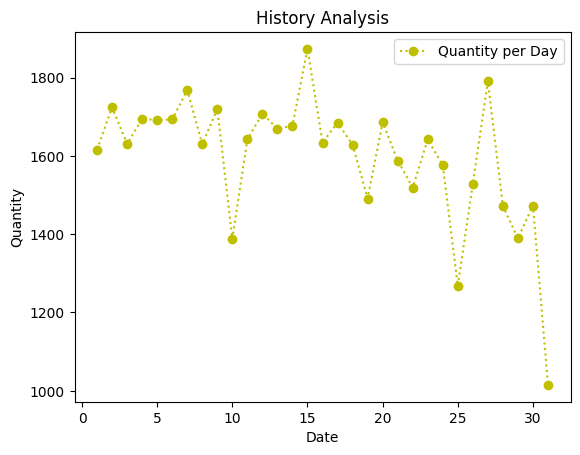

In [100]:

plt.plot(df2['date'], df2['quantity'], marker='o', linestyle=':', color='y', label='Quantity per Day')
plt.xlabel('Date') 
plt.ylabel('Quantity') 
plt.title('History Analysis')  
plt.legend()
plt.show()


Text(0.5, 1.0, 'history als')

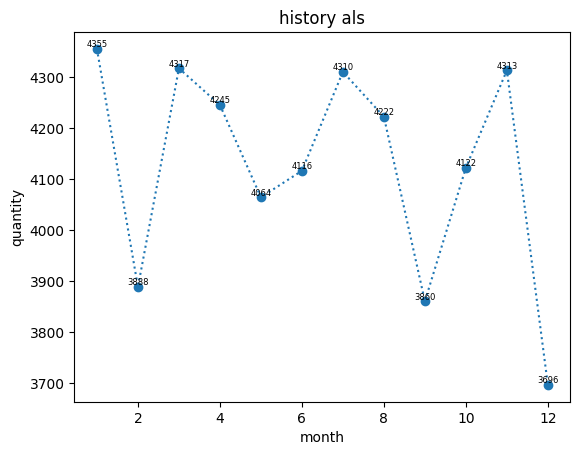

In [108]:
plt.plot(df3['month'],df3['quantity'],marker='o', linestyle=':')
# Add labels and title
for x, y in zip(df3['month'], df3['quantity']):
    plt.text(x, y,f'{y}', fontsize=6, ha='center', va='bottom') 
plt.xlabel('month')
plt.ylabel('quantity')
plt.title('history als')

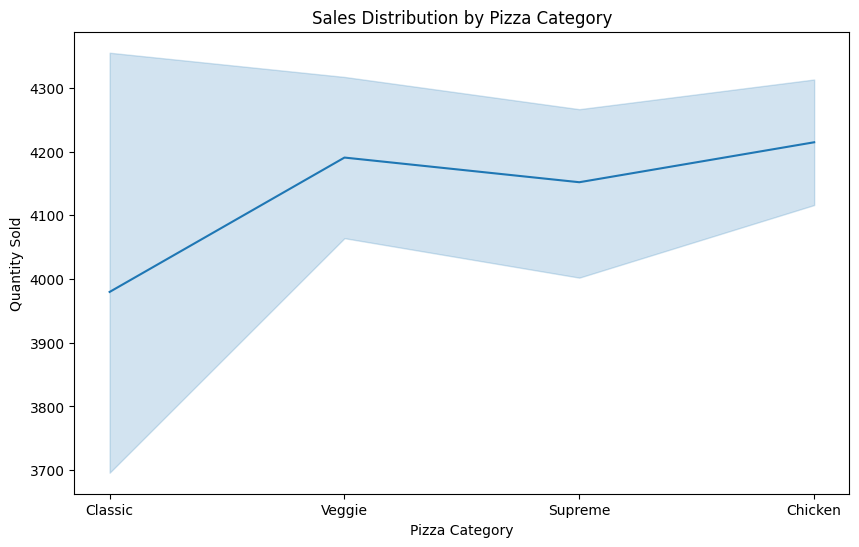

In [ ]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cleaned, x='pizza_category', y=df3['quantity'])
plt.title('Sales Distribution by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Quantity Sold')
plt.show()

INGRADIENTS

In [168]:
ingredients_data = pd.read_csv(r'C:/Users/HP/Desktop/MY PROJECTS/MINI PROJECT/Pizza_ingredients - Pizza_ingredients.csv')

In [169]:
ingredients_data.head(10)

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
5,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecue Sauce,15.0
6,bbq_ckn_m,The Barbecue Chicken Pizza,Barbecued Chicken,30.0
7,bbq_ckn_m,The Barbecue Chicken Pizza,Red Peppers,10.0
8,bbq_ckn_m,The Barbecue Chicken Pizza,Green Peppers,15.0
9,bbq_ckn_m,The Barbecue Chicken Pizza,Tomatoes,20.0


In [170]:
ingredients_data.drop_duplicates(inplace=True)

In [186]:
print(ingredients_data.isnull().sum())

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    0
dtype: int64


In [173]:
ingredients_data['pizza_ingredients'].unique

<bound method Series.unique of 0      Barbecued Chicken
1            Red Peppers
2          Green Peppers
3               Tomatoes
4             Red Onions
             ...        
513        Green Peppers
514           Red Onions
515             Zucchini
516              Spinach
517               Garlic
Name: pizza_ingredients, Length: 518, dtype: object>

In [174]:
ingredients_data['Items_Qty_In_Grams'].interpolate(method='linear', inplace=True)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Aggregate sales by week for prediction
weekly_sales = df_cleaned.resample('W', on='order_date')['quantity'].sum()

# Fit ARIMA model
model = ARIMA(weekly_sales, order=(5, 1, 0))  
model_fit = model.fit()

# Forecast next 7 days (next week)
forecast = model_fit.forecast(steps=7)
print(f"Next week's forecasted sales: {forecast}")


Next week's forecasted sales: 2016-01-10    871.413388
2016-01-17    767.668443
2016-01-24    688.069738
2016-01-31    831.365366
2016-02-07    763.325170
2016-02-14    647.463213
2016-02-21    788.409586
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [183]:
# Merge sales with ingredients data based on pizza type
merged_data = pd.merge(df_cleaned, ingredients_data, on='pizza_name_id')



In [201]:
merged_data=merged_data.drop(columns=['pizza_ingredients_x','pizza_name_x'],axis=1)

In [212]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267224 entries, 0 to 267223
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   pizza_name_id        267224 non-null  object        
 1   quantity             267224 non-null  int64         
 2   order_date           267224 non-null  datetime64[ns]
 3   order_time           267224 non-null  object        
 4   unit_price           267224 non-null  float64       
 5   total_price          267224 non-null  float64       
 6   pizza_size           267224 non-null  object        
 7   pizza_category       267224 non-null  object        
 8   year                 267224 non-null  int32         
 9   month                267224 non-null  int32         
 10  date                 267224 non-null  int32         
 11  pizza_name_y         267224 non-null  object        
 12  pizza_ingredients_y  267224 non-null  object        
 13  Items_Qty_In_G

In [231]:

next_week_forecasted_pizzas = 871.413388  # Forecasted sales for 2016-01-10

# Calculate the total historical ingredient usage
merged_data['total_ingredient_needed'] = merged_data['Items_Qty_In_Grams'] * merged_data['quantity']

# Group by ingredients to sum up the total historical usage
ingredient_requirements = (
    merged_data.groupby('pizza_ingredients_y')['total_ingredient_needed']
    .sum()
    .reset_index()
)
ingredient_requirements.columns = ['Ingredient', 'Total_Ingredient_Historic']

# Calculate total pizzas in historical data
total_pizzas_historic = merged_data['quantity'].sum()

# Calculate the scaling factor for the next week's forecast
scaling_factor = next_week_forecasted_pizzas / total_pizzas_historic

# Forecast ingredient requirements for the next week
ingredient_requirements['Forecasted_Ingredient_Required'] = (
    ingredient_requirements['Total_Ingredient_Historic'] * scaling_factor
)

# Filter only the required columns
next_week_ingredient_forecast = ingredient_requirements[['Ingredient', 'Forecasted_Ingredient_Required']]

# Display the result
print(next_week_ingredient_forecast.head(15))

            Ingredient  Forecasted_Ingredient_Required
0         ?duja Salami                      131.260955
1        Alfredo Sauce                       48.750869
2            Anchovies                      135.724852
3           Artichokes                      403.366644
4              Arugula                       46.734916
5        Asiago Cheese                      227.354727
6                Bacon                     1605.594759
7       Barbecue Sauce                       85.806010
8    Barbecued Chicken                      249.306217
9     Beef Chuck Roast                      475.668967
10         Blue Cheese                      134.780874
11   Brie Carre Cheese                       46.942911
12    Calabrese Salami                      690.543983
13           Capocollo                     2467.462768
14  Caramelized Onions                       31.295274


In [249]:
total_pizzas_in_week = weekly_sales[-4]
print(total_pizzas_in_week)

838


C:\Users\HP\AppData\Local\Temp\ipykernel_2624\2614504691.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_pizzas_in_week = weekly_sales[-4]
